In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import impute

In [3]:
# Set random seed for reproducibility
np.random.seed(42)
n_samples = 1000

In [4]:
# create a series of datetime with a frequency of 10 hours
s = pd.date_range('2020-01-06', '2020-01-10', freq = '10H').to_series()

C:\Users\Chand\AppData\Local\Temp\ipykernel_15088\627764916.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  s = pd.date_range('2020-01-06', '2020-01-10', freq = '10H').to_series()


In [5]:
features = {
    'dayofweek': s.dt.dayofweek.values,
    "dayofyear": s.dt.dayofyear.values,
    "hour": s.dt.hour.values,
    "is_leap_year": s.dt.is_leap_year.values,
    "quarter": s.dt.quarter.values,
    "weekofyear": s.dt.isocalendar().week.values
}

In [6]:
# this function create features 
def generate_features(df):
    df.loc[:, 'year'] = df['date'].dt.year
    df.loc[:, 'month'] = df['date'].dt.month
    df.loc[:, 'weekofyear'] = df['date'].dt.isocalendar().week.values
    df.loc[:, 'dayofweek'] = df['date'].dt.dayofweek
    df.loc[:, 'weekend'] = (df['date'].dt.weekday >= 5).astype(int)
    
    # create an aggregate dictionary
    aggs = {}
    aggs['month'] = ['nunique', 'mean']
    aggs['weekofyear'] = ['nunique', 'mean']
    
    aggs['num1'] = ['sum','max','min','mean']
    aggs['customer_id'] = ['size', 'nunique']
    
    # group by customer_id and calculate the aggregate
    agg_df = df.groupby('customer_id').agg(aggs)
    agg_df = agg_df.reset_index()
    return agg_df
    

In [7]:
# generate a dataframe
# Generate dates
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
df = pd.DataFrame({
    'date': np.random.choice(dates, n_samples),
    'customer_id': np.random.randint(1, 101, n_samples),  # 100 unique customers
    'num1': np.random.uniform(10, 1000, n_samples)
})

In [8]:
df.head(6)

,date,customer_id,num1
0,2023-04-13,3,791.801522
1,2023-12-15,33,662.120698
2,2023-09-28,6,503.213759
3,2023-04-17,50,559.809915
4,2023-03-13,10,722.009760
5,2023-07-08,5,236.170194


In [9]:
generate_features(df) 

customer_id   month           weekofyear                    num1  \
               nunique      mean    nunique       mean          sum   
0            1       6  4.888889          8  19.111111  3923.002999   
1            2       6  6.545455          9  25.818182  5010.351052   
2            3       9  5.818182         10  23.545455  4470.810405   
3            4       7  7.000000          7  28.428571  3272.450474   
4            5       9  6.166667         11  24.166667  5695.293655   
..         ...     ...       ...        ...        ...          ...   
95          96       6  8.500000          7       35.0  4157.798112   
96          97       7  6.909091         10  27.454545  4681.992499   
97          98      11  6.833333         16  27.388889  9004.910457   
98          99       8  6.333333         12  25.333333  5881.166912   
99         100       6  5.750000          8     23.375  4835.006364   

                                       customer_id          
           max         min        mean        size nunique  
0   767.234429   78.944737  435.889222           9       1  
1   852.910708   40.345977  455.486459          11       1  
2   791.801522   35.934741  406.437310          11       1  
3   938.014186   35.553788  467.492925           7       1  
4   998.364036  144.000541  474.607805          12       1  
..         ...         ...         ...         ...     ...  
95  923.529619  168.470919  519.724764           8       1  
96  667.166482  129.006965  425.635682          11       1  
97  966.163940   61.735300  500.272803          18       1  
98  862.756296  127.152829  490.097243          12       1  
99  915.939168  316.278991  604.375795           8       1  

[100 rows x 11 columns]

#### When features are not individual but a list of values

In [10]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30])
feature_dict = {}
# calculate mean
feature_dict['mean'] = np.mean(x)
# calculate max
feature_dict['max'] = np.max(x)
# calculate min
feature_dict['min'] = np.min(x)
# calculate standard deviation
feature_dict['std'] = np.std(x)
# calculate variance
feature_dict['var'] = np.var(x)
# peak-to-peak
feature_dict['ptp'] = np.ptp(x)

# percentile features
feature_dict['percentile_10'] = np.percentile(x, 10)
feature_dict['percentile_60'] = np.percentile(x, 60)
feature_dict['percentile_90'] = np.percentile(x, 90)

# quantile features
feature_dict['quantile_5'] = np.quantile(x, 0.05)
feature_dict['quantile_95'] = np.quantile(x, 0.95)
feature_dict['quantile_99'] = np.quantile(x, 0.99)
print(feature_dict)

{'mean': np.float64(10.357142857142858), 'max': np.int64(30), 'min': np.int64(1), 'std': np.float64(8.590752028091794), 'var': np.float64(73.80102040816327), 'ptp': np.int64(29), 'percentile_10': np.float64(2.3), 'percentile_60': np.float64(8.8), 'percentile_90': np.float64(23.500000000000007), 'quantile_5': np.float64(1.65), 'quantile_95': np.float64(26.75), 'quantile_99': np.float64(29.349999999999994)}


#### polynomial features

In [11]:
df = pd.DataFrame(
np.random.rand(100, 2),
columns=[f"f_{i}" for i in range(1, 3)]
)
print(df)


         f_1       f_2
0   0.001565  0.636401
1   0.051135  0.257607
2   0.059525  0.603795
3   0.686590  0.114488
4   0.383839  0.456237
..       ...       ...
95  0.476843  0.687722
96  0.722707  0.692532
97  0.134435  0.299396
98  0.358716  0.804437
99  0.278760  0.210705

[100 rows x 2 columns]


In [12]:
pf = preprocessing.PolynomialFeatures(
degree=2,
interaction_only=False,
include_bias=False
)

# fit to the features
pf.fit(df)

# create polynomial features
poly_feats = pf.transform(df)

# create a dataframe with all the features
num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(
poly_feats,
columns=[f"f_{i}" for i in range(1, num_feats + 1)]
)

df_transformed

,f_1,f_2,f_3,f_4,f_5
0,0.001565,0.636401,0.000002,0.000996,0.405007
1,0.051135,0.257607,0.002615,0.013173,0.066361
2,0.059525,0.603795,0.003543,0.035941,0.364569
3,0.686590,0.114488,0.471406,0.078606,0.013107
4,0.383839,0.456237,0.147332,0.175121,0.208152
...,...,...,...,...,...
95,0.476843,0.687722,0.227380,0.327936,0.472962
96,0.722707,0.692532,0.522305,0.500498,0.479601
97,0.134435,0.299396,0.018073,0.040249,0.089638
98,0.358716,0.804437,0.128677,0.288564,0.647119


In [13]:
## binning
# create bins of the numerical columns 
# 10 bins
df["f_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)
# 100 bins
df["f_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False)
df

,f_1,f_2,f_bin_10,f_bin_100
0,0.001565,0.636401,0,0
1,0.051135,0.257607,0,5
2,0.059525,0.603795,0,5
3,0.686590,0.114488,6,69
4,0.383839,0.456237,3,39
...,...,...,...,...
95,0.476843,0.687722,4,48
96,0.722707,0.692532,7,73
97,0.134435,0.299396,1,13
98,0.358716,0.804437,3,36


In [14]:
## add a high variance column 
df["f_3"] = np.random.randn(100, 1) * 1000
df["f_3"].mean()

np.float64(-34.76023341672199)

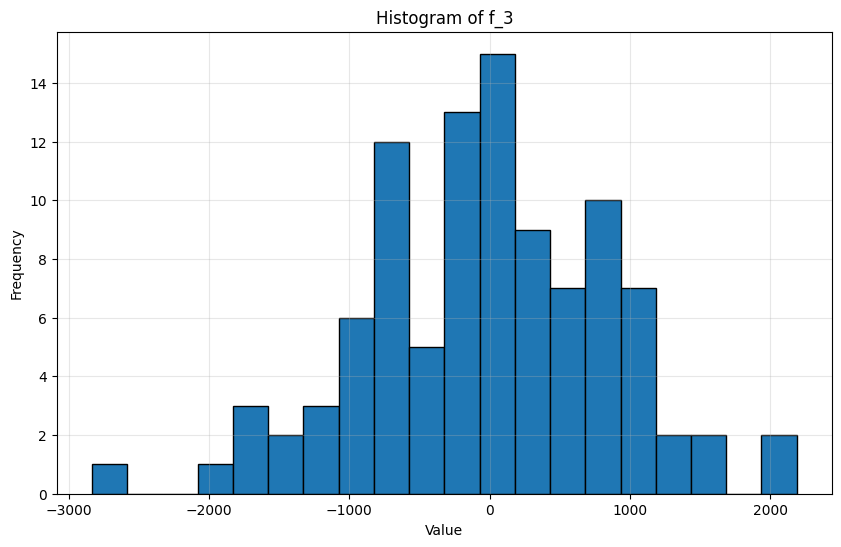

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['f_3'], bins=20, edgecolor='black')
plt.title('Histogram of f_3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

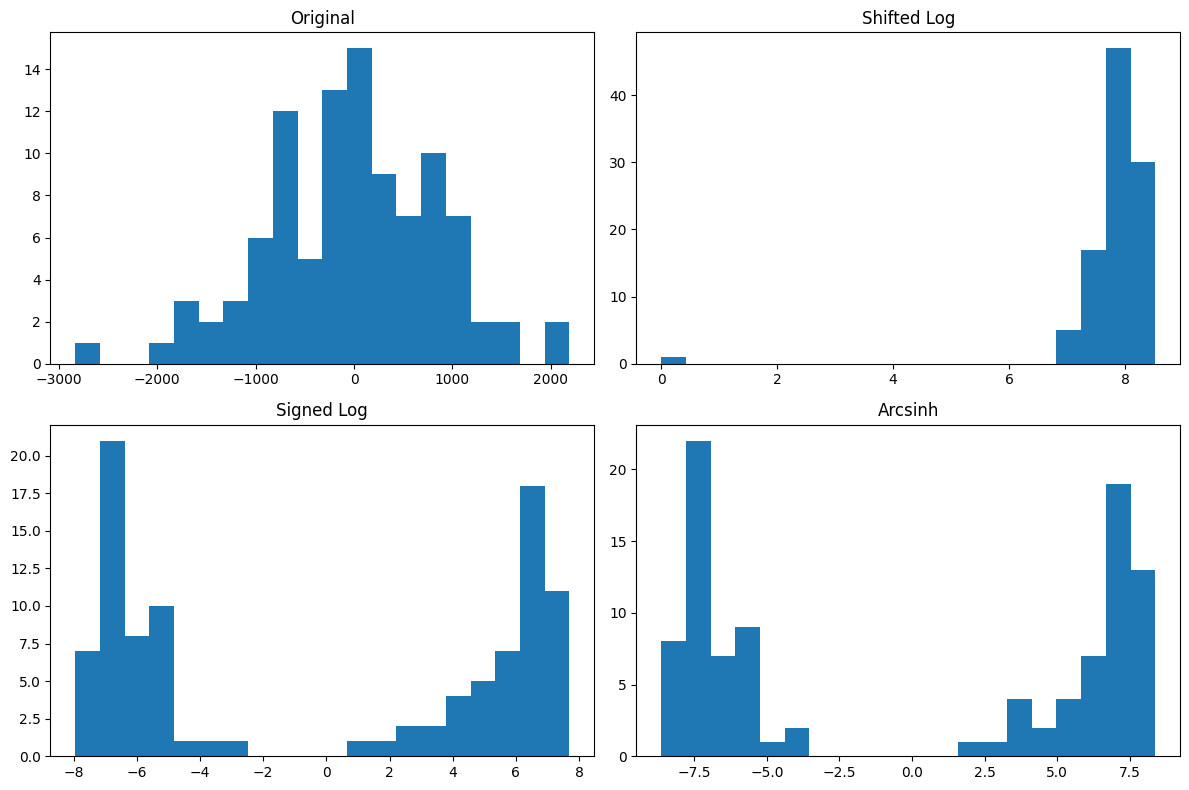

In [16]:
## can reduce variance by transfomr to log
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original distribution
axes[0,0].hist(df['f_3'], bins=20)
axes[0,0].set_title('Original')

# Shifted log
min_val = df['f_3'].min()
shifted_log = np.log(df['f_3'] - min_val + 1)
axes[0,1].hist(shifted_log, bins=20)
axes[0,1].set_title('Shifted Log')

# Signed log
signed_log = np.sign(df['f_3']) * np.log1p(np.abs(df['f_3']))
axes[1,0].hist(signed_log, bins=20)
axes[1,0].set_title('Signed Log')

# Arcsinh
arcsinh = np.arcsinh(df['f_3'])
axes[1,1].hist(arcsinh, bins=20)
axes[1,1].set_title('Arcsinh')

plt.tight_layout()
plt.show()

In [17]:
# compare the variance
print(df.f_3.var(), shifted_log.var(), signed_log.var(), arcsinh.var())

754160.0775814446 0.7268584635751121 38.01692762423727 46.835392840385204


#### If ever encounter missing values in cate features, treat it as a new category.
Fill in the missing values using a k-nearest neighbour method, can use the KNN imputer implementation for filling missing values.

In [18]:
# create a numpy array with 10 samples and 6 features
X = np.random.randint(1, 15, (10, 6))
X = X.astype(float)

# radnom assign 10 elements to nan
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan
X

array([[ 2., 14.,  3., 12.,  9., 12.],
       [ 7.,  9., 13.,  2.,  5., 13.],
       [ 4.,  2.,  9.,  9.,  6., nan],
       [ 6.,  8.,  6.,  1.,  4., 13.],
       [ 7., 13., 13.,  2.,  9.,  8.],
       [nan, nan, nan, nan,  3., 12.],
       [ 6., 12., 12., nan, nan,  8.],
       [nan,  6.,  1.,  4., nan, 12.],
       [11.,  3., 13.,  9.,  1.,  6.],
       [ 6., 10.,  5., 12., nan, 10.]])

In [19]:
# use 2 nearest neighbors to fill na values
knn_imputer = impute.KNNImputer(n_neighbors=2)
X_imputed = knn_imputer.fit_transform(X)
X_imputed

array([[ 2. , 14. ,  3. , 12. ,  9. , 12. ],
       [ 7. ,  9. , 13. ,  2. ,  5. , 13. ],
       [ 4. ,  2. ,  9. ,  9. ,  6. ,  9. ],
       [ 6. ,  8. ,  6. ,  1. ,  4. , 13. ],
       [ 7. , 13. , 13. ,  2. ,  9. ,  8. ],
       [ 6.5,  7. ,  3.5,  2.5,  3. , 12. ],
       [ 6. , 12. , 12. ,  2. ,  7. ,  8. ],
       [ 6. ,  6. ,  1. ,  4. ,  3.5, 12. ],
       [11. ,  3. , 13. ,  9. ,  1. ,  6. ],
       [ 6. , 10. ,  5. , 12. ,  6. , 10. ]])

Another way is to train a regression model that tries to predict missing values in a column based on other columns.

Imputing values for tree-based models is unnecessary because they can handle it themselves.